# TP3

- Autores: 
    - Valentín Pertierra
    - Leandro Saraco
- Año 2024

## Consigna

Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en
Material_TPs / images a partir del template Material_TPs / template

1.(4 puntos) Obtener una detección del logo en cada imagen sin falsos positivos.
2.(4 puntos) Plantear y validar un algoritmo para múltiples detecciones en la imagen coca_multi png con el mismo témplate del ítem 1.
3.(2 puntos) Generalizar el algoritmo del item 2 para todas las imágenes

Visualizar los resultados con bounding boxes en cada imagen mostrando el nivel de confianza de la detección

In [1]:
# %matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os

In [13]:
def resize_template(template, img):
    """Resize the template if it is larger than the image."""
    t_h, t_w = template.shape[:2]
    i_h, i_w = img.shape[:2]

    if t_h > i_h or t_w > i_w:
        scale = min(i_w / t_w, i_h / t_h)
        new_w = int(t_w * scale)
        new_h = int(t_h * scale)
        resized_template = cv.resize(template, (new_w, new_h), interpolation=cv.INTER_AREA)
        return resized_template
    return template

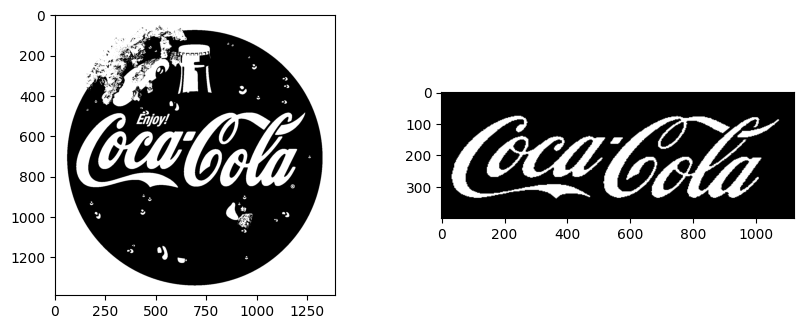

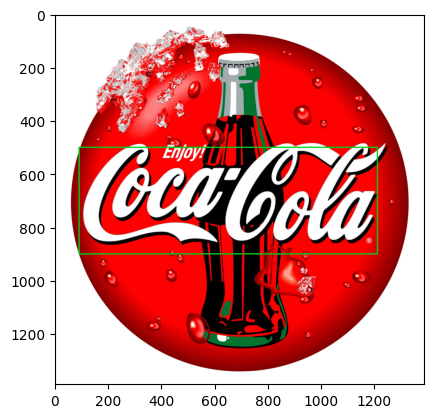

In [50]:
# Paths de imagenes y template
images_folder = './images'
template_path = './template/pattern.png'
# template_path = './template/template_facil.jpg'

# Cargo template e invierto colores (las imágenes tienen el logo de coca con letras en blanco)
template = cv.imread(template_path, cv.IMREAD_GRAYSCALE)
template = cv.bitwise_not(template)
# Hago binarización del template
_, template = cv.threshold(template, 100, 255, cv.THRESH_BINARY)



# Hago template matching de cada imagen
for filename in os.listdir(images_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Leo la imagen actual
        image_path = os.path.join(images_folder, filename)
        img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
        # Hago binarización de la imagen
        _, img = cv.threshold(img, 100, 255, cv.THRESH_BINARY)

        # En algunos casos el template es más grande que la imagen, en ese caso hay que ajustar su tamaño
        # template_resized = resize_template(template,img)
        w, h = template.shape[::-1]
        template_resized = cv.resize(template, (1120,400), interpolation=cv.INTER_AREA)
        w, h = template_resized.shape[::-1]
        
        # Corro el algoritmo de template matching
        result = cv.matchTemplate(img, template_resized, cv.TM_CCOEFF_NORMED)
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)
        
        # Dibujo bounding box
        top_left = max_loc        
        bottom_right = (top_left[0] + w, top_left[1] + h)
        img_color = cv.imread(image_path)
        color_match = (30, 209, 2)
        cv.rectangle(img_color, top_left, bottom_right, color_match, 4)
        
        # Muestro resultado
        plt.figure(figsize=(10,8))
        plt.subplot(2,2,1)
        plt.imshow(img,cmap="gray")
        plt.subplot(2,2,2)
        plt.imshow(template_resized,cmap="gray")
        plt.figure()
        plt.imshow(cv.cvtColor(img_color,cv.COLOR_BGR2RGB))
        break


